# Analyze and prediction on the Kaggle's Titanic dataset

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#Alterando configurações padrão dos plots
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
df_train = pd.read_csv('dataset/train.csv')

## Dataset analyzes and cleaning

In [79]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class_label
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,class-3
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,class-1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,class-3
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,class-1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,class-3


In [78]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#setting passanger ID as the dataframe index
df_train.set_index('PassengerId', inplace=True, verify_integrity=True)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


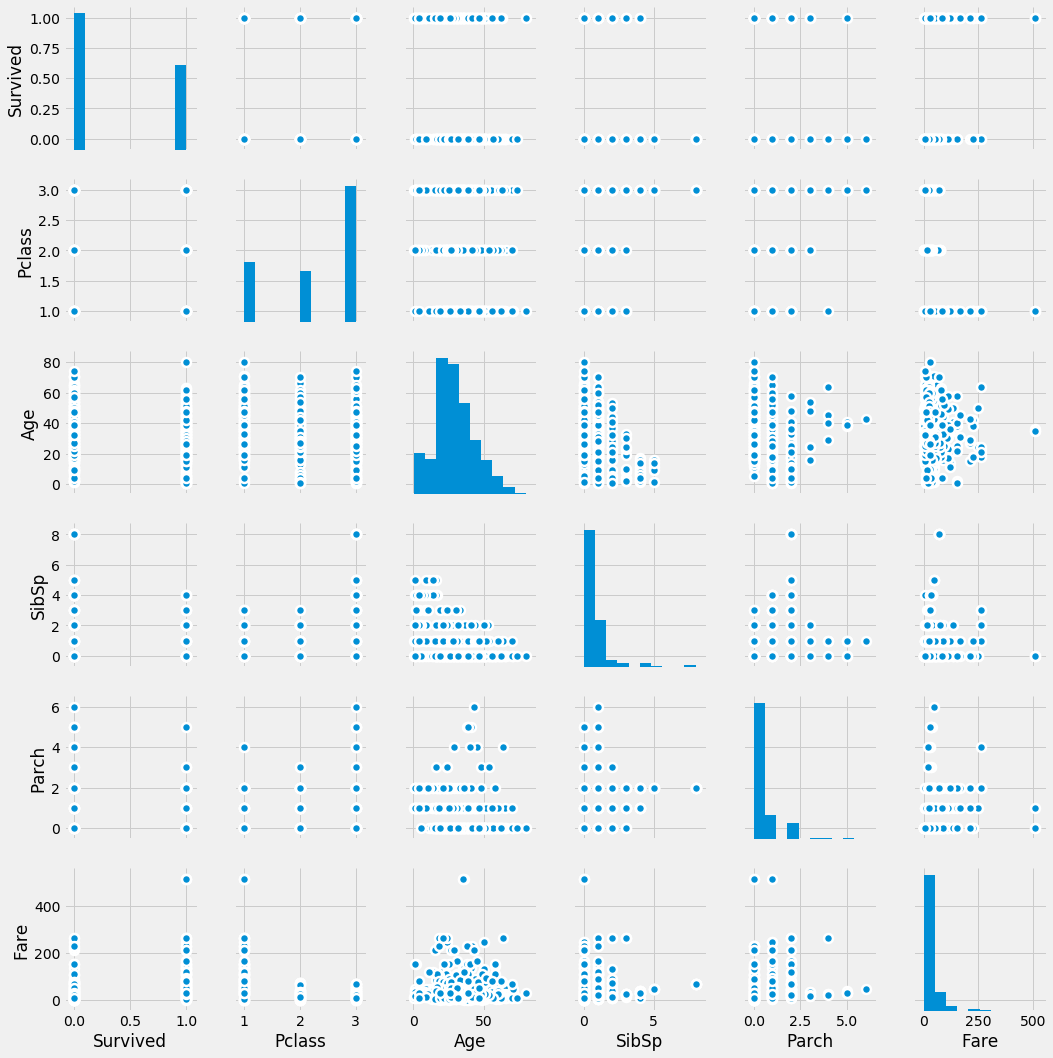

In [76]:
sns.pairplot(df_train, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

**Ticket Class**: To better visualize the ticket class as a categorical variable, I created a new row where I name each class as *class-1, class-2* and *class-3*. This will help to label the following visualizations.

In [7]:
df_train['Class_label'] = df_train['Pclass'].map({1:'class-1', 2:'class-2', 3:'class-3'})

### Age NaN values
There are missing values for Age and at that point I don't know if it can intefere in the prediction. To gain some insight about this issue I've done explorations over the theme to help me understand the problem.

***Note:*** The test dataset can have NaN values as well so i think that some data normalization can be needed before validating the model

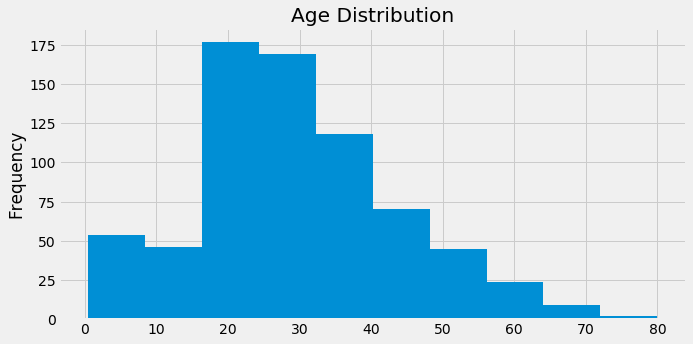

In [12]:
# Age distribution
df_train['Age'].plot(kind='hist', title='Age Distribution')
plt.show()
#df_train.plot(kind='hist', y='Age', x='Pclass')

In [98]:
#Age distribution by Sex
# referencia: https://medium.com/@lorran.rodr/criando-a-pir%C3%A2mide-et%C3%A1ria-dos-acidentes-de-trabalho-no-brasil-com-seaborn-cd960f56ffa2
df_age = df_train[['Sex', 'Age']].copy()

In [99]:
df_age['age_group'] = pd.cut(df_age.Age, [0, 10, 20, 30, 40, 50, 60, 70, 80])

In [108]:
df_age['count'] = 1

In [121]:
pv = pd.pivot_table(data=df_age, values='count', columns='Sex', index='age_group', aggfunc=np.sum, dropna=True).fillna(0)

In [120]:
pv

Sex,female,male
age_group,,
"(0, 10]",31.0,33.0
"(10, 20]",46.0,69.0
"(20, 30]",81.0,149.0
"(30, 40]",55.0,100.0
"(40, 50]",31.0,55.0
"(50, 60]",14.0,28.0
"(60, 70]",3.0,14.0
"(70, 80]",NaN,5.0


In [54]:
df_age['piram_age'] = df_age.apply(lambda x: x['Age']*(-1) if x['Sex'] == 'male' else x['Age'], axis=1)

In [95]:
df_age.sort_values('Age', ascending=False)

,Sex,Age,piram_age,age_group
PassengerId,,,,
631,male,80.0,-80.0,"(70.0, 80.0]"
852,male,74.0,-74.0,"(70.0, 80.0]"
494,male,71.0,-71.0,"(70.0, 80.0]"
97,male,71.0,-71.0,"(70.0, 80.0]"
117,male,70.5,-70.5,"(70.0, 80.0]"
673,male,70.0,-70.0,"(60.0, 70.0]"
746,male,70.0,-70.0,"(60.0, 70.0]"
34,male,66.0,-66.0,"(60.0, 70.0]"
55,male,65.0,-65.0,"(60.0, 70.0]"


In [89]:
df_age.head(50)

,Sex,Age,piram_age,age_group
PassengerId,,,,
1,male,22.0,-22.0,"(20.0, 30.0]"
2,female,38.0,38.0,"(30.0, 40.0]"
3,female,26.0,26.0,"(20.0, 30.0]"
4,female,35.0,35.0,"(30.0, 40.0]"
5,male,35.0,-35.0,"(30.0, 40.0]"
6,male,NaN,NaN,NaN
7,male,54.0,-54.0,"(50.0, 60.0]"
8,male,2.0,-2.0,"(0.0, 10.0]"
9,female,27.0,27.0,"(20.0, 30.0]"


In [72]:
bar_order = df_age.Age.unique()[::-1]

In [82]:
sns.barplot(x='PassengerId', y='Sex', data=df_age.loc[df_age['Sex']=='male',:])

ValueError: Could not interpret input 'PassengerId'

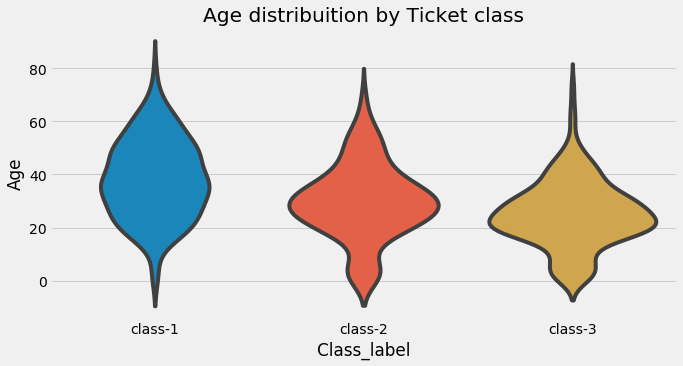

In [14]:
sb.violinplot(data=df_train, x='Class_label', y='Age', inner=None, order=[ "class-1", "class-2", "class-3"]).set_title('Age distribuition by Ticket class')
plt.show()

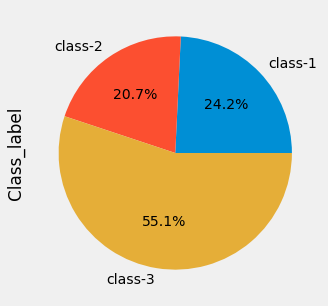

In [80]:
#Passangers per class
df_train.groupby(['Class_label'])['Class_label'].count().plot(kind='pie', autopct='%.1f%%', )
plt.show()

TO DOs
-Criar grafico de distribui sobreposto para idade por sexo
-Ordenar gráfico de violino pelas classes